# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8440383787856686f0502b02c0df4a00"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mizdah
Processing Record 2 of Set 1 | garden city
Processing Record 3 of Set 1 | dudinka
Processing Record 4 of Set 1 | calipatria
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | olavarria
Processing Record 7 of Set 1 | matsuyama
Processing Record 8 of Set 1 | fabens
Processing Record 9 of Set 1 | reggane
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | yorkton
Processing Record 13 of Set 1 | tefe
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | nar'yan-mar
Processing Record 17 of Set 1 | coquimbo
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | zaysan
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | iqaluit
Processing Record 23 of Set 1 | khan

Processing Record 39 of Set 4 | port mathurin
Processing Record 40 of Set 4 | rikaze
Processing Record 41 of Set 4 | les cayes
Processing Record 42 of Set 4 | ebon
Processing Record 43 of Set 4 | kapuskasing
Processing Record 44 of Set 4 | enewetak
Processing Record 45 of Set 4 | al qadarif
Processing Record 46 of Set 4 | nova sintra
Processing Record 47 of Set 4 | uturoa
Processing Record 48 of Set 4 | yei
Processing Record 49 of Set 4 | dalandzadgad
Processing Record 0 of Set 5 | corinto
Processing Record 1 of Set 5 | dunedin
Processing Record 2 of Set 5 | pyin oo lwin
Processing Record 3 of Set 5 | margaret river
Processing Record 4 of Set 5 | shivpuri
Processing Record 5 of Set 5 | hobyo
Processing Record 6 of Set 5 | kataragama
City not found. Skipping...
Processing Record 7 of Set 5 | ambarakaraka
City not found. Skipping...
Processing Record 8 of Set 5 | st. john's
Processing Record 9 of Set 5 | guiping
Processing Record 10 of Set 5 | praia da vitoria
Processing Record 11 of Set

Processing Record 27 of Set 8 | thunder bay
Processing Record 28 of Set 8 | noumea
Processing Record 29 of Set 8 | polyarnyy
Processing Record 30 of Set 8 | impfondo
Processing Record 31 of Set 8 | basco
Processing Record 32 of Set 8 | sitka
Processing Record 33 of Set 8 | santiago de cao
Processing Record 34 of Set 8 | islamkot
Processing Record 35 of Set 8 | ponta delgada
Processing Record 36 of Set 8 | sao gabriel da cachoeira
Processing Record 37 of Set 8 | sarh
Processing Record 38 of Set 8 | khovd
Processing Record 39 of Set 8 | taunton
Processing Record 40 of Set 8 | fort bragg
Processing Record 41 of Set 8 | pingliang
Processing Record 42 of Set 8 | noosa heads
Processing Record 43 of Set 8 | porto novo
Processing Record 44 of Set 8 | haimen
Processing Record 45 of Set 8 | kuvshinovo
Processing Record 46 of Set 8 | jaynagar-majilpur
Processing Record 47 of Set 8 | chonchi
Processing Record 48 of Set 8 | mejit
Processing Record 49 of Set 8 | cannonvale
Processing Record 0 of Set

Processing Record 17 of Set 12 | cururupu
Processing Record 18 of Set 12 | makushino
Processing Record 19 of Set 12 | norilsk
Processing Record 20 of Set 12 | bao loc
City not found. Skipping...
Processing Record 21 of Set 12 | dhuusamarreeb
Processing Record 22 of Set 12 | ocean pointe
City not found. Skipping...
Processing Record 23 of Set 12 | tshabong
Processing Record 24 of Set 12 | salinopolis
Processing Record 25 of Set 12 | margate
Processing Record 26 of Set 12 | along
Processing Record 27 of Set 12 | gizo
Processing Record 28 of Set 12 | puerto aysen
Processing Record 29 of Set 12 | zhanaozen
Processing Record 30 of Set 12 | phan rang-thap cham
Processing Record 31 of Set 12 | hun
Processing Record 32 of Set 12 | tabou
Processing Record 33 of Set 12 | kogalym
Processing Record 34 of Set 12 | conception bay south
Processing Record 35 of Set 12 | slave lake
Processing Record 36 of Set 12 | new richmond
Processing Record 37 of Set 12 | skeldon
Processing Record 38 of Set 12 | ax

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print("Record Count:")
print(city_data_df.count())

Record Count:
City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64


In [5]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mizdah,31.4451,12.9801,53.55,50,7,4.88,LY,1708022629
1,garden city,42.3256,-83.3310,39.15,87,100,18.41,US,1708022477
2,dudinka,69.4058,86.1778,-11.33,95,98,14.00,RU,1708022629
3,calipatria,33.1256,-115.5142,63.25,34,100,1.61,US,1708022629
4,longyearbyen,78.2186,15.6401,26.44,93,75,9.22,SJ,1708022630
...,...,...,...,...,...,...,...,...,...
564,tramandai,-29.9847,-50.1336,75.99,63,100,16.26,BR,1708022740
565,urengoy,65.9667,78.3667,-13.09,96,100,15.17,RU,1708022740
566,moose jaw,50.4001,-105.5344,-0.13,71,75,10.36,CA,1708022740
567,shiqian,27.5225,108.2281,44.67,84,100,1.19,CN,1708022740


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mizdah,31.4451,12.9801,53.55,50,7,4.88,LY,1708022629
1,garden city,42.3256,-83.3310,39.15,87,100,18.41,US,1708022477
2,dudinka,69.4058,86.1778,-11.33,95,98,14.00,RU,1708022629
3,calipatria,33.1256,-115.5142,63.25,34,100,1.61,US,1708022629
4,longyearbyen,78.2186,15.6401,26.44,93,75,9.22,SJ,1708022630


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

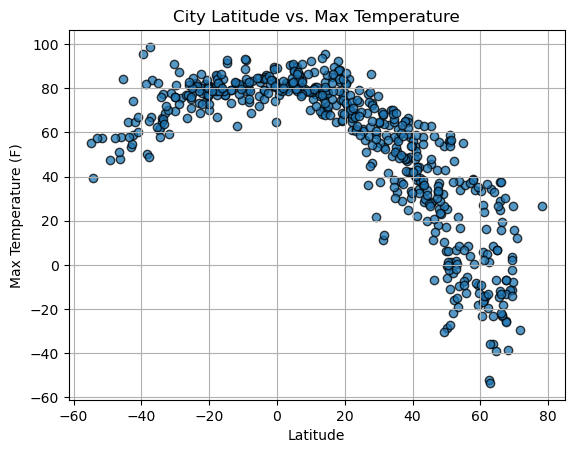

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

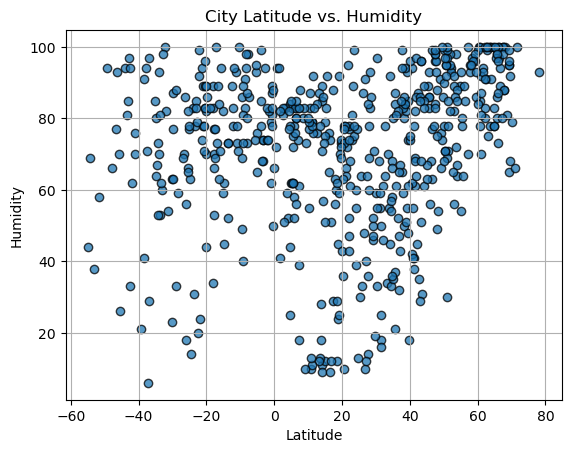

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

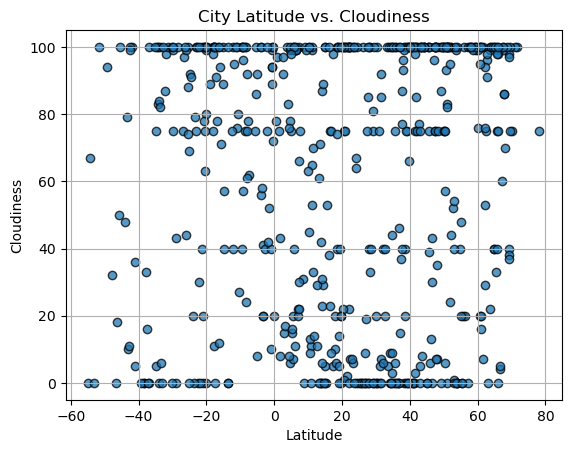

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

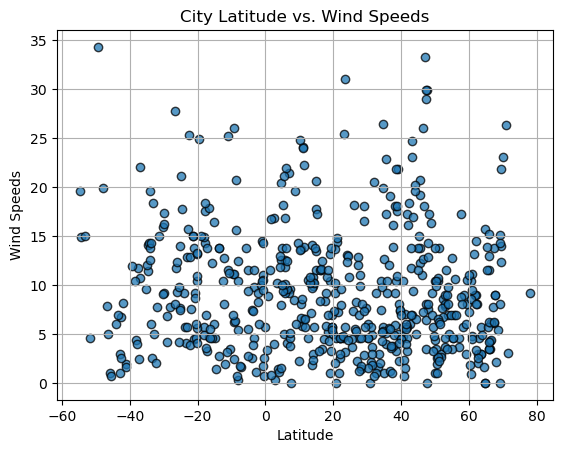

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speeds")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,x,y):
    
    (slope, intercept, rvalues, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print("The r-value is: " + str(rvalues))
    
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy =(x,y), fontsize = 12, color = "green")

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mizdah,31.4451,12.9801,53.55,50,7,4.88,LY,1708022629
1,garden city,42.3256,-83.3310,39.15,87,100,18.41,US,1708022477
2,dudinka,69.4058,86.1778,-11.33,95,98,14.00,RU,1708022629
3,calipatria,33.1256,-115.5142,63.25,34,100,1.61,US,1708022629
4,longyearbyen,78.2186,15.6401,26.44,93,75,9.22,SJ,1708022630


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,olavarria,-36.8927,-60.3225,83.93,29,0,10.67,AR,1708022630
9,ushuaia,-54.8000,-68.3000,55.06,44,0,19.57,AR,1708022630
10,waitangi,-43.9535,-176.5597,64.81,94,48,5.99,NZ,1708022630
12,tefe,-3.3542,-64.7114,86.11,74,20,4.61,BR,1708022631
14,puerto ayora,-0.7393,-90.3518,89.56,89,89,11.01,EC,1708022631


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8656418423906063


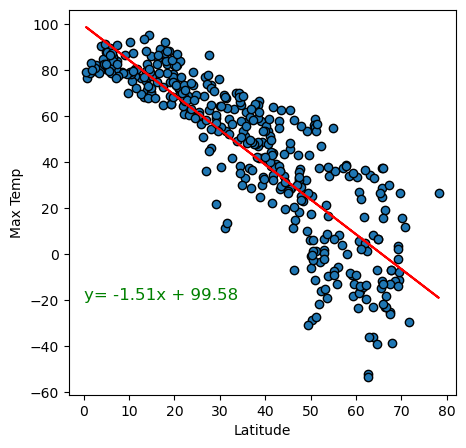

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.figure(figsize = (5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, 0, -20)

The r-value is: 0.6353420379955684


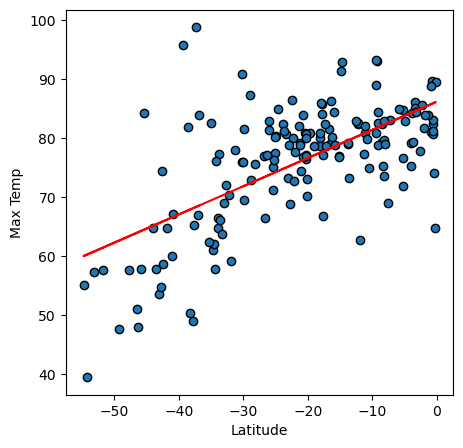

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.figure(figsize = (5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, -55, 32)

**Discussion about the linear relationship:** As the latitude number increases, the temperature increases as well. The higher numbers of latitude are closer to the equator, making it hotter towards to center of the earth.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.41573502957880865


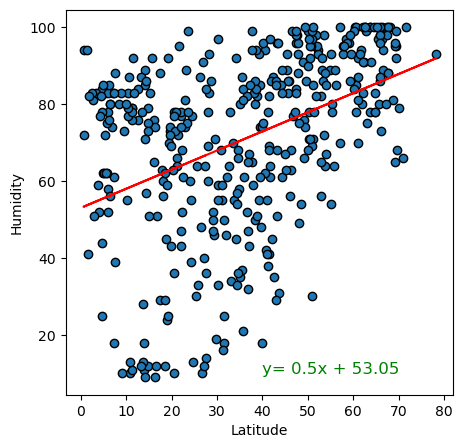

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regression(x_values, y_values, 40, 10)

The r-value is: 0.23674845356906218


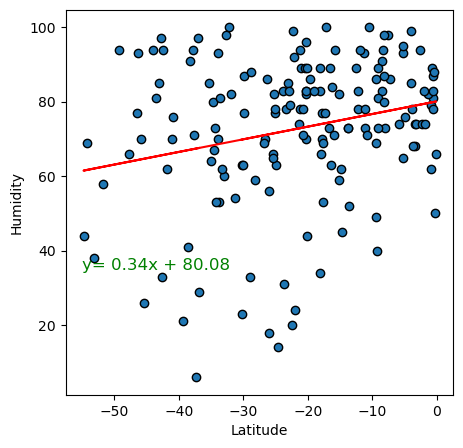

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, -55, 35)

**Discussion about the linear relationship:** There is not a clear linear relationship between latitude and humidity in the norther or southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17518830117164938


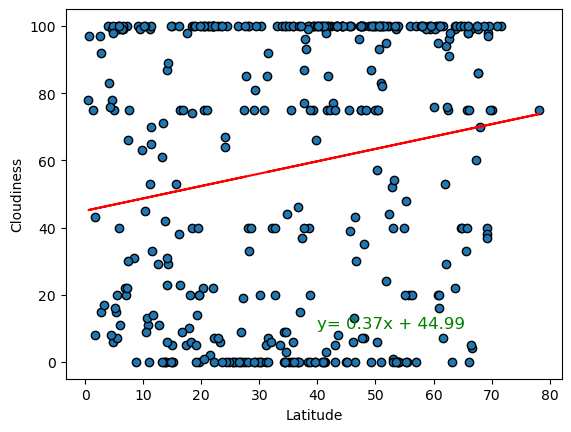

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, 40, 10)

The r-value is: 0.20140783198367315


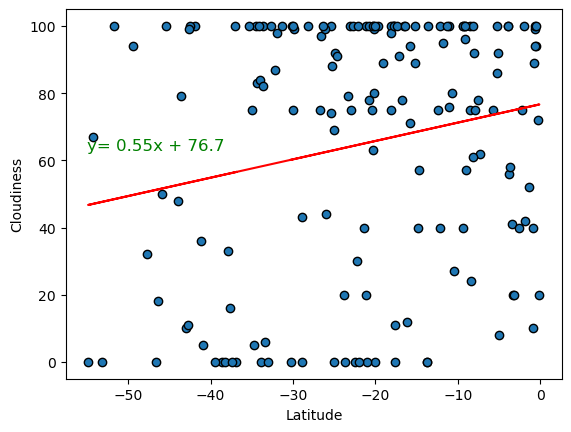

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regression(x_values, y_values, -55, 63)

**Discussion about the linear relationship:** There is not a clear linear relationship between latitude and cloudiness in the norther or southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.06649106485083364


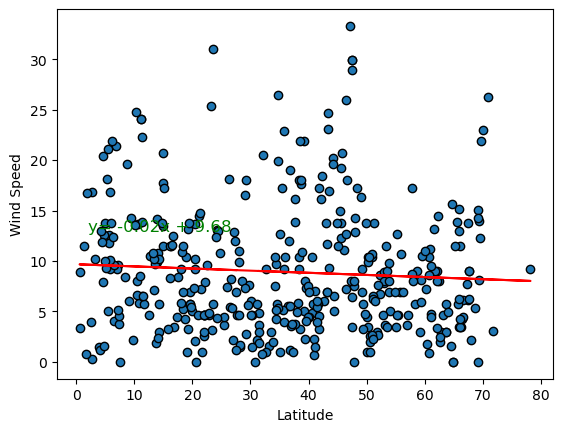

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, 2, 13)

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regression(x_values, y_values, -30, 9)

**Discussion about the linear relationship:** There is not a clear linear relationship between latitude and wind speed in the norther or southern hemispheres.